# Cryptocurrency Price Prediction with AUTO TS
---

#### This program aims to develop a machine learning model to predict Bitcoin prices using **AUTO TS**.

Cryptocurrency is a digital currency in which transactions are verified and records maintained by a decentralized system using cryptography, rather than by a centralized authority. For this program we'll use Bitcoin, wich is one of the most popular cryptocurrencies today.

**Auto_timeseries (AUTO TS)** is a complex model building utility for time series data. Since it automates many Tasks involved in a complex endeavor, it assumes many intelligent defaults. AUTO TS will rapidly build predictive models based on Statsmodels ARIMA, Seasonal ARIMA, Prophet and Scikit-Learn ML. It will automatically select the best model which gives best score specified.   
*source:* https://pypi.org/project/auto-ts/

The data was obtained from **YAHOO! FINANCE** using yfinance API to get historical prices since 2021, January.  
*source:* https://pypi.org/project/yfinance/

<img src="https://user-images.githubusercontent.com/44107852/232332112-330712e3-4ed0-4703-a88e-4fc4edbe68db.png" align="left" alt="imdb logo" width="40" height="40">   


*This price model prediction can only work in situations where prices changes due to historical variation. Any other price variation reasons, such as government regulations, changes in financial policies, etc do not impact the presented predictions.*


### 1. Colect and process data
---

#### Colecting and processing Bitcoin historical prices data from yfinance API:

In [1]:
# Import modules:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import mplfinance as mpf
from auto_ts import auto_timeseries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imported auto_timeseries version:0.0.69. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
# Getting data from file cryptocurrency_get_data.py:
exec(open('cryptocurrency_get_data.py').read())

There are 0 missing values on Data frame
Data frame shape: (837, 6)
Data frame extraction from 2021-01-01 to 2023-04-18
cryptocurrency_get_data successfully run


#### Making a candlestick chart to visualize Bitcoin Prices and the Simple Moving Average since 2021, January:

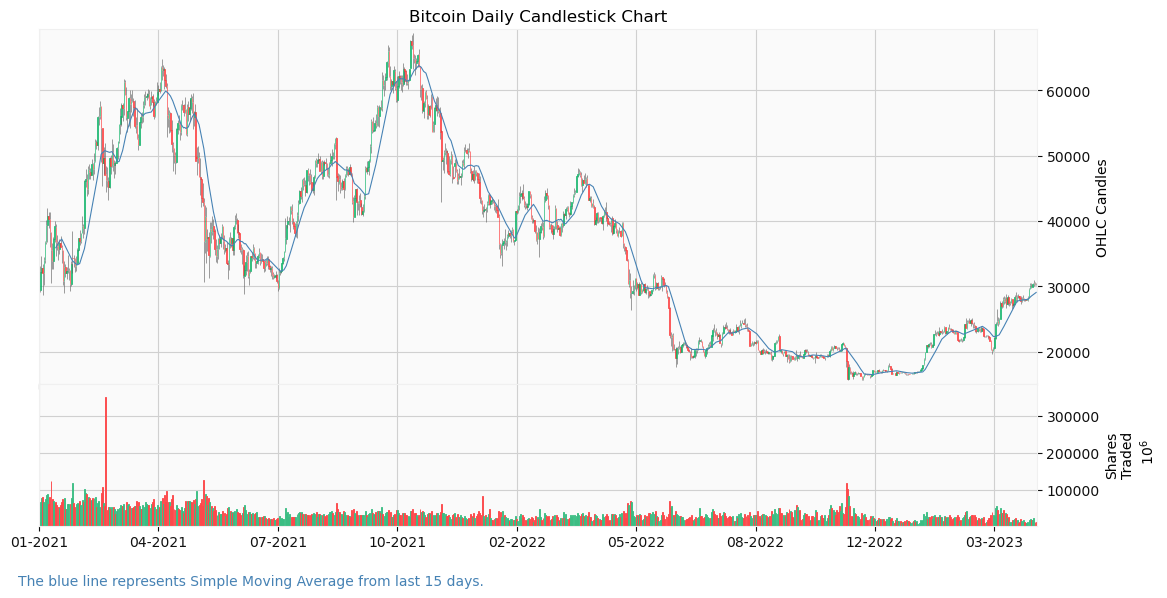

In [3]:
# Selecting and preparing data:
today = date.today().isoformat()
df_cdstk = df_btc.set_index('date')
df_cdstk = df_cdstk.loc['2021-01-01':today,:]

# Creating Candlestick chart:
fig, axes = mpf.plot(df_cdstk, type='candle', mav=(15), volume=True, style='yahoo',
         figratio=(20,10), datetime_format='%m-%Y', mavcolors=["#4682B4"],
         xrotation=0, tight_layout=True, axtitle='Bitcoin Daily Candlestick Chart',
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded', returnfig=True)

fig.text(0.09, 0.005, "The blue line represents Simple Moving Average from last 15 days.", 
         color="#4682B4",fontsize=10);

#### Splitting train and test data:

To build the model were used historical prices of the last 60 days.   

The data were splitted into training and testing considering the proportion of 90:10, that is, 90% of the data for training and 10% for testing.

In [4]:
# Setting date 60 days ago:
today = date.today().isoformat()
period = (date.today()-timedelta(days=60)).isoformat()

In [5]:
# Selecting dataset:
df = df_btc.loc[df_btc.date >= period].reset_index(drop=True)

In [6]:
# Using ratio 90:10 to split test and train dataset: 
count_lines = len(df.index)
limit = int(count_lines*0.9)

train = df.iloc[:limit]
test = df.iloc[limit-1:]

print("Train length: {}".format(train.shape[0]))
print("Test length: {}".format(test.shape[0]))

Train length: 54
Test length: 8


#### Building a line chart to visualize train-test dataset:

The dependent variable, i.e. the variable that the model will predict is **"Close"** - Daily Close Price.

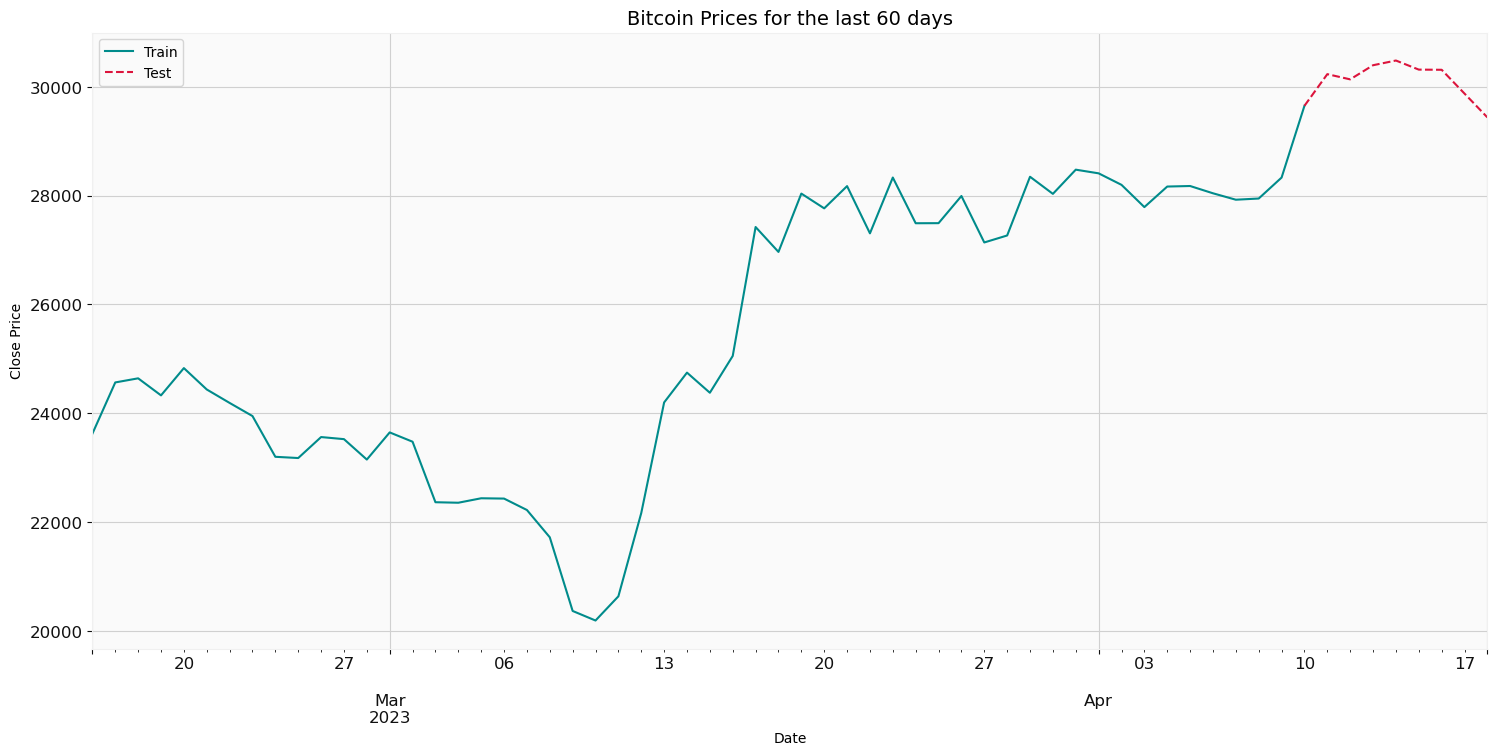

In [7]:
# Preparing dataset:
train_chart = train.set_index('date')
test_chart = test.set_index('date')

# Building train-test chart:
train_chart.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_chart.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson', ls='--')
plt.legend()
plt.title("Bitcoin Prices for the last 60 days", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.show()

### 2. Model Building
---

#### Model Building using AUTO TS:

In [8]:
# Setting model parameters: 
# forecast_period: the period or number of days, months, hours the model will predict.
# score_type: the metric used for scoring the models.
# time_interval: indicate the frequency at which the data is collected.
# model tipe: The type of model to build.

model = auto_timeseries(forecast_period=test.shape[0], score_type='rmse', time_interval='D', model_type='best')

Start of Fit.....
    Target variable given as = close
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['close']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (54, 5)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


23:25:57 - cmdstanpy - INFO - Chain [1] start processing


kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3

Fold Number: 1 --> Train Shape: 30 Test Shape: 8


23:25:58 - cmdstanpy - INFO - Chain [1] done processing
23:25:58 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 2,970.02
    Std Deviation of actuals = 436.66
    Normalized RMSE (as pct of std dev) = 680%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 38 Test Shape: 8


23:25:58 - cmdstanpy - INFO - Chain [1] done processing
23:25:58 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 3,371.46
    Std Deviation of actuals = 478.75
    Normalized RMSE (as pct of std dev) = 704%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 46 Test Shape: 8


23:25:59 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 2,611.31
    Std Deviation of actuals = 551.94
    Normalized RMSE (as pct of std dev) = 473%
Cross Validation window: 3 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 2755.16
    MSE (Mean Squared Error = 9002232.93
    MAPE (Mean Absolute Percent Error) = 10%
    RMSE (Root Mean Squared Error) = 3000.3721
    Normalized RMSE (MinMax) = 112%
    Normalized RMSE (as Std Dev of Actuals)= 542%
Time Taken = 2 seconds


23:25:59 - cmdstanpy - INFO - Chain [1] start processing
23:25:59 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=690.799, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=489.543, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=491.520, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=491.518, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=493.563, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=484.780, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=493.835, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=488.127, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=486.85

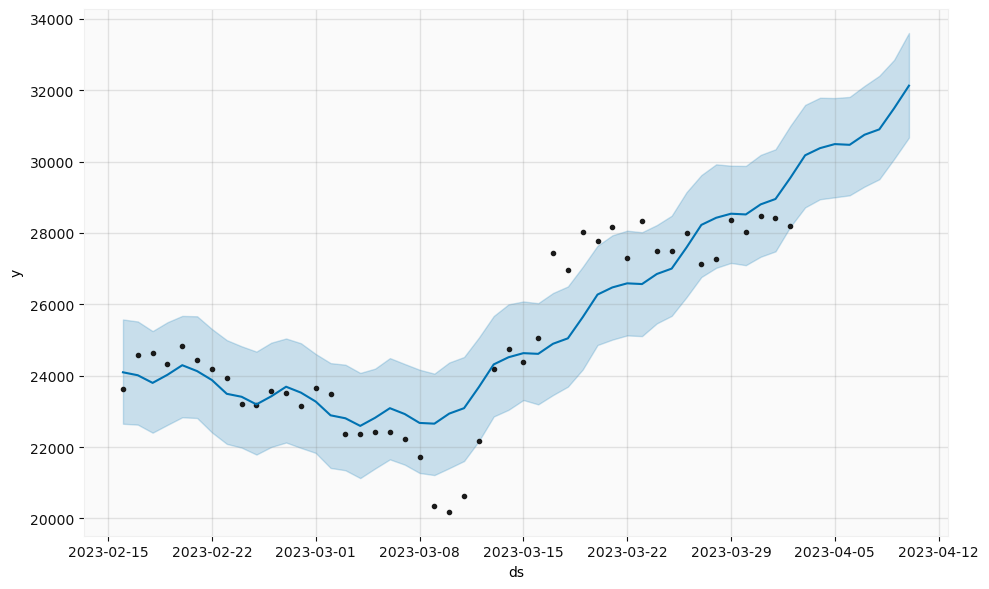

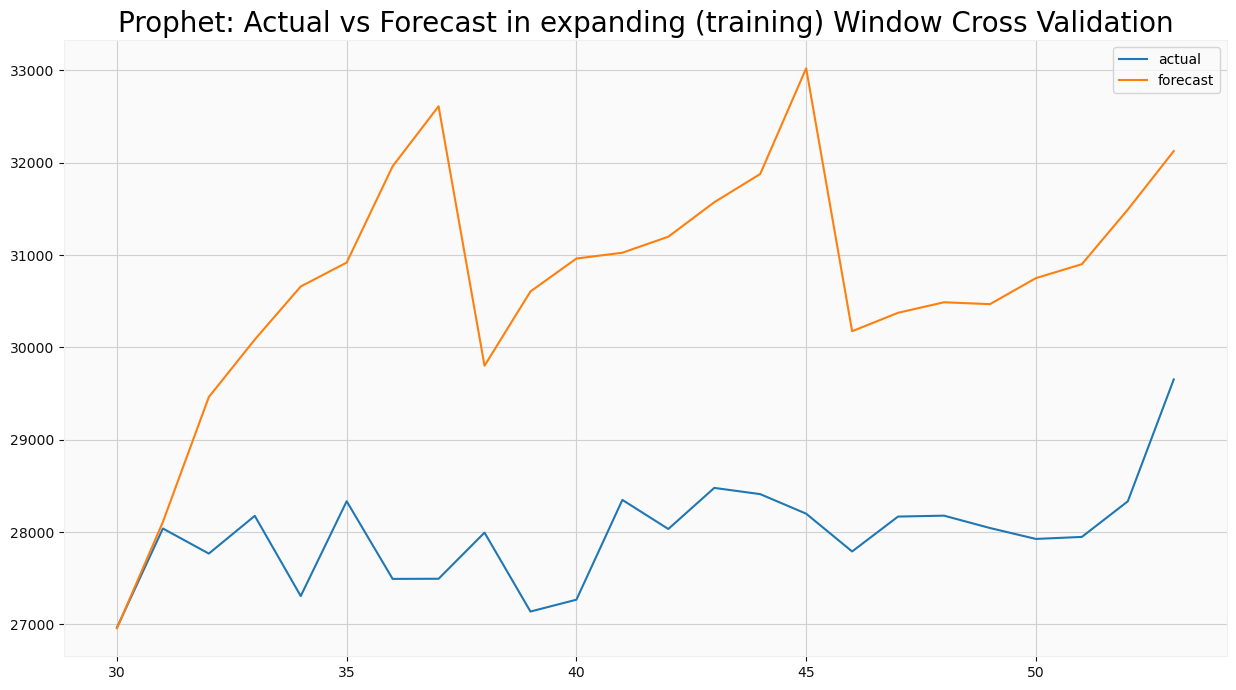

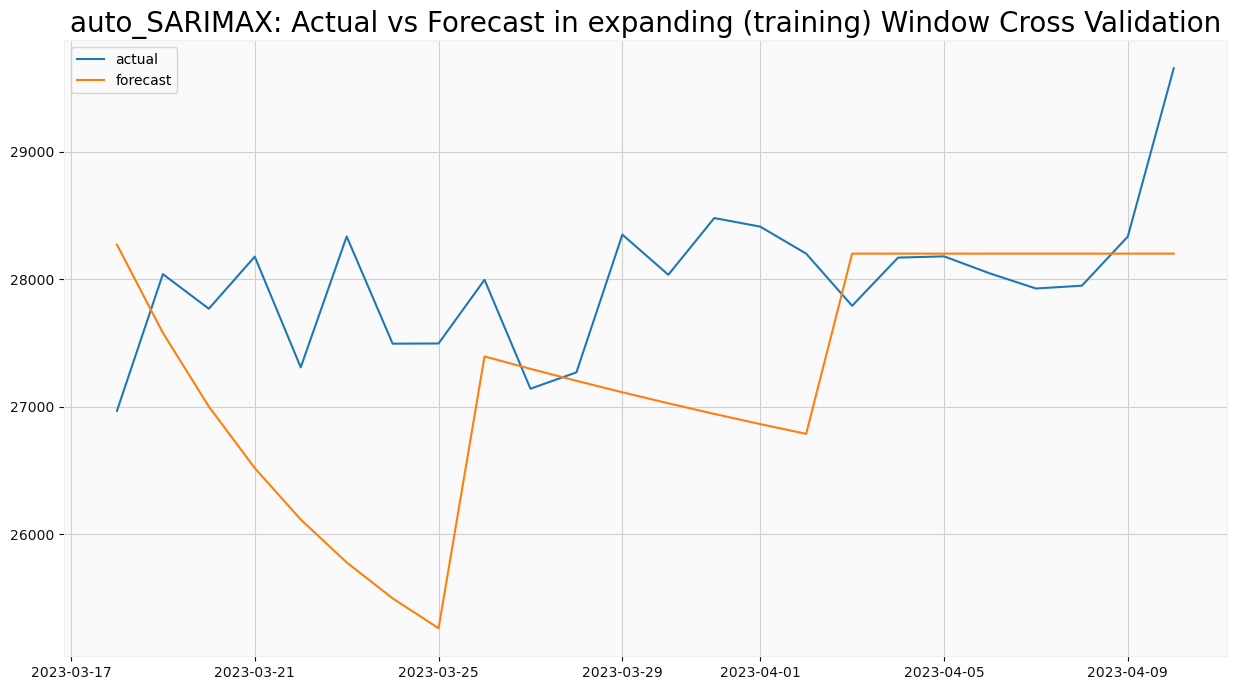

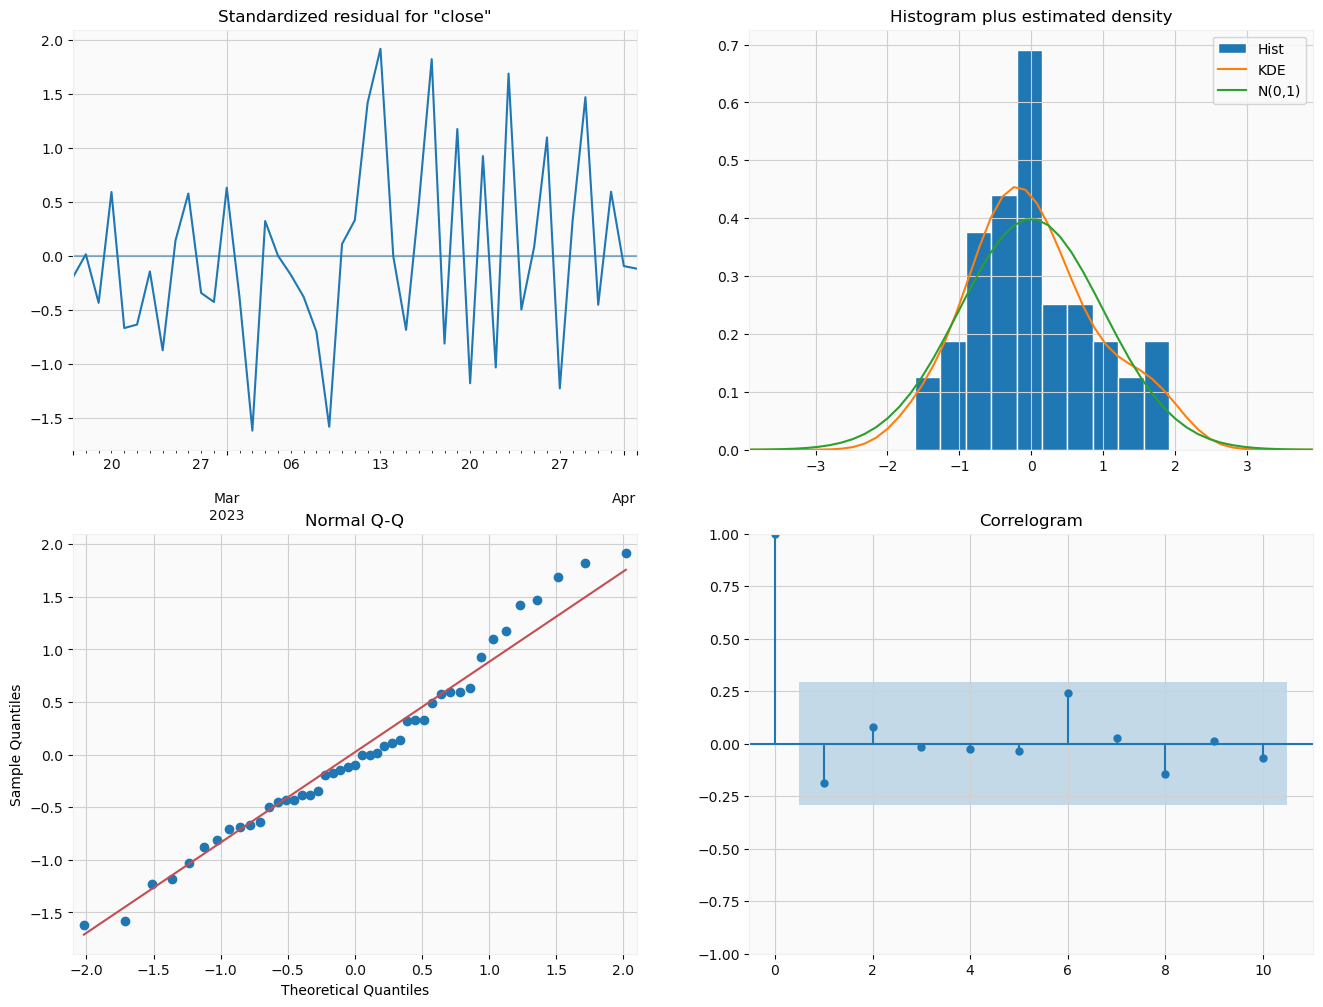

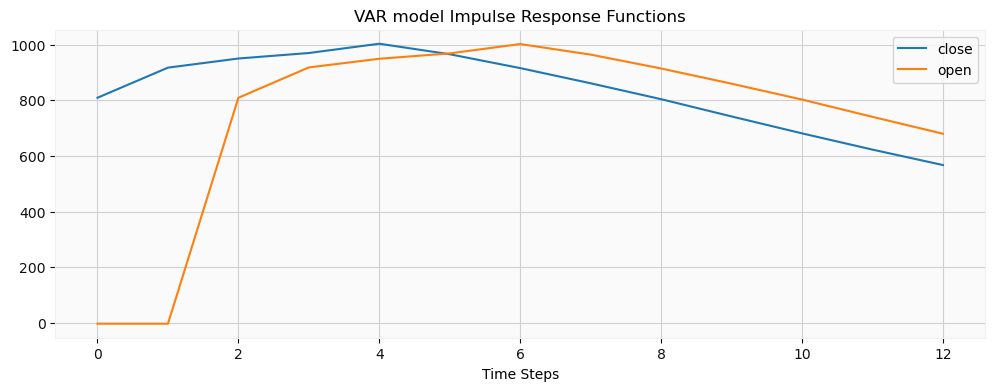

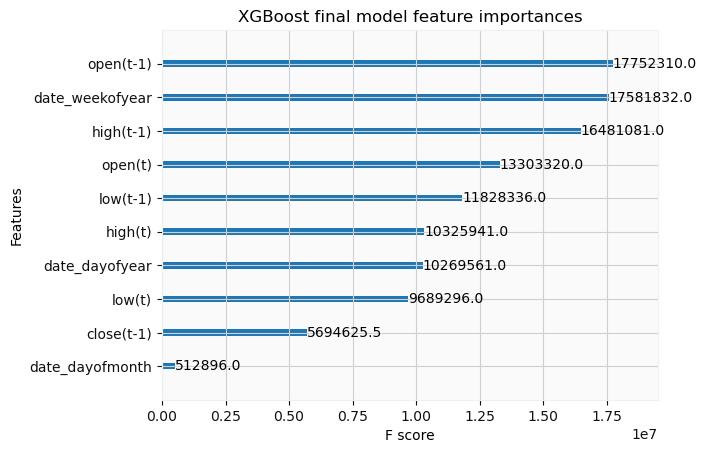

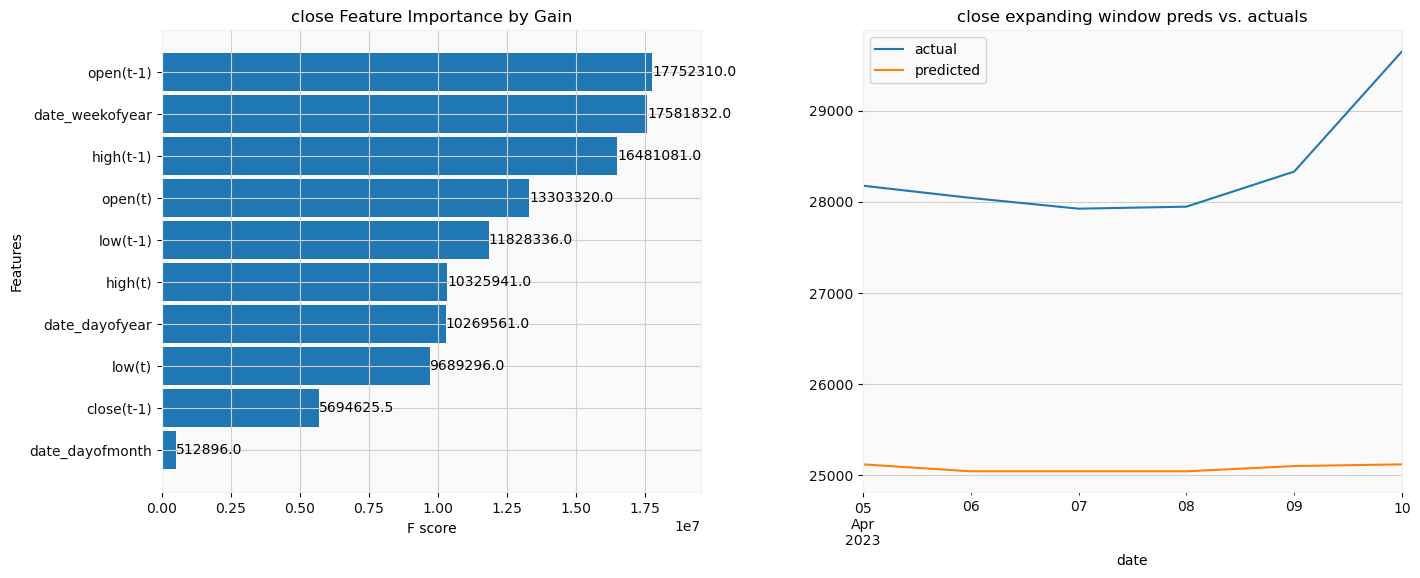

In [9]:
# Fitting model:
# traindata: it contains the training set.
# ts_column: it contains the DateTime of the time series.
# cv: number of folds to cross validation data set

model.fit(traindata=train, ts_column='date', target='close', cv=3)

### 3. Model Evaluation
---

#### Let's visualize the model training results:

To evaluate the models, the **Root Mean Square Error (RMSE)** was used. RMSE calculates the error of a model when making predictions. It indicates the absolute fit of the model to the data – how close the observed data points are to the predicted values.

In [10]:
# Getting model training results:
model.get_leaderboard()

,name,rmse
1,auto_SARIMAX,1106.920596
2,VAR,2671.790979
0,Prophet,2984.263032
3,ML,3319.247718


The best model is **AUTO_SARIMAX** whose RMSE score is 1,106.92.   

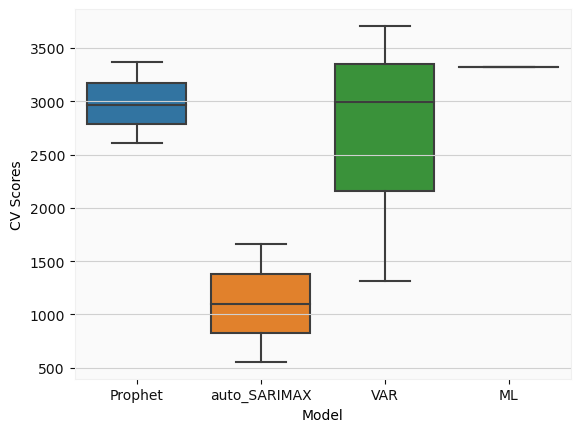

In [11]:
# Showing the best models in a boxplot chart:
model.plot_cv_scores();

#### Now, let's see the model performance with test dataset:

In [12]:
# Showing prediction:
predictions = model.predict(testdata=test, model='best')
print(predictions)

Predicting using test dataframe as input for auto_SARIMAX model
close               yhat     mean_se  mean_ci_lower  mean_ci_upper
2023-04-11  29725.114860  341.983235   29054.840037   30395.389683
2023-04-12  30365.354089  483.637328   29417.442344   31313.265835
2023-04-13  30081.528179  592.332338   28920.578131   31242.478228
2023-04-14  30547.935439  683.966469   29207.385793   31888.485086
2023-04-15  30698.065290  764.697760   29199.285222   32196.845358
2023-04-16  30560.544946  837.684425   28918.713642   32202.376250
2023-04-17  30671.033859  904.802591   28897.653367   32444.414351
2023-04-18  30019.304469  967.274657   28123.480978   31915.127960


In [13]:
# Preparing test dataset:
y_true = test.close.to_numpy()
y_pred = predictions.yhat.to_numpy()

In [14]:
# Calculating RMSE for the test dataset:
rmse = mean_squared_error(y_true, y_pred, squared=False)
print("RMSE: {:.2f}".format(rmse))

RMSE: 277.09


Comparing the test dataset and model predictions for the same period, **277.09** was obtained for the RMSE score. This means that the prediction can be wrong by an average of USD 277.09 (plus or minus).

To see the performance in relative terms, we can calculate the **MAPE** score. MAPE (Mean Absolute Percentage Error) is the mean absolute percentage difference between the actual and the predicted value.

In [15]:
# Calculating MAPE for the test dataset:
mape = mean_absolute_percentage_error(y_true, y_pred)
print("MAPE: {:.2f}%".format(mape*100))

MAPE: 0.75%


The model achieved **0.75%** on average of all absolute percentage errors between the predicted and actual values.

#### Finally, lets see the model result of predictions in a chart:

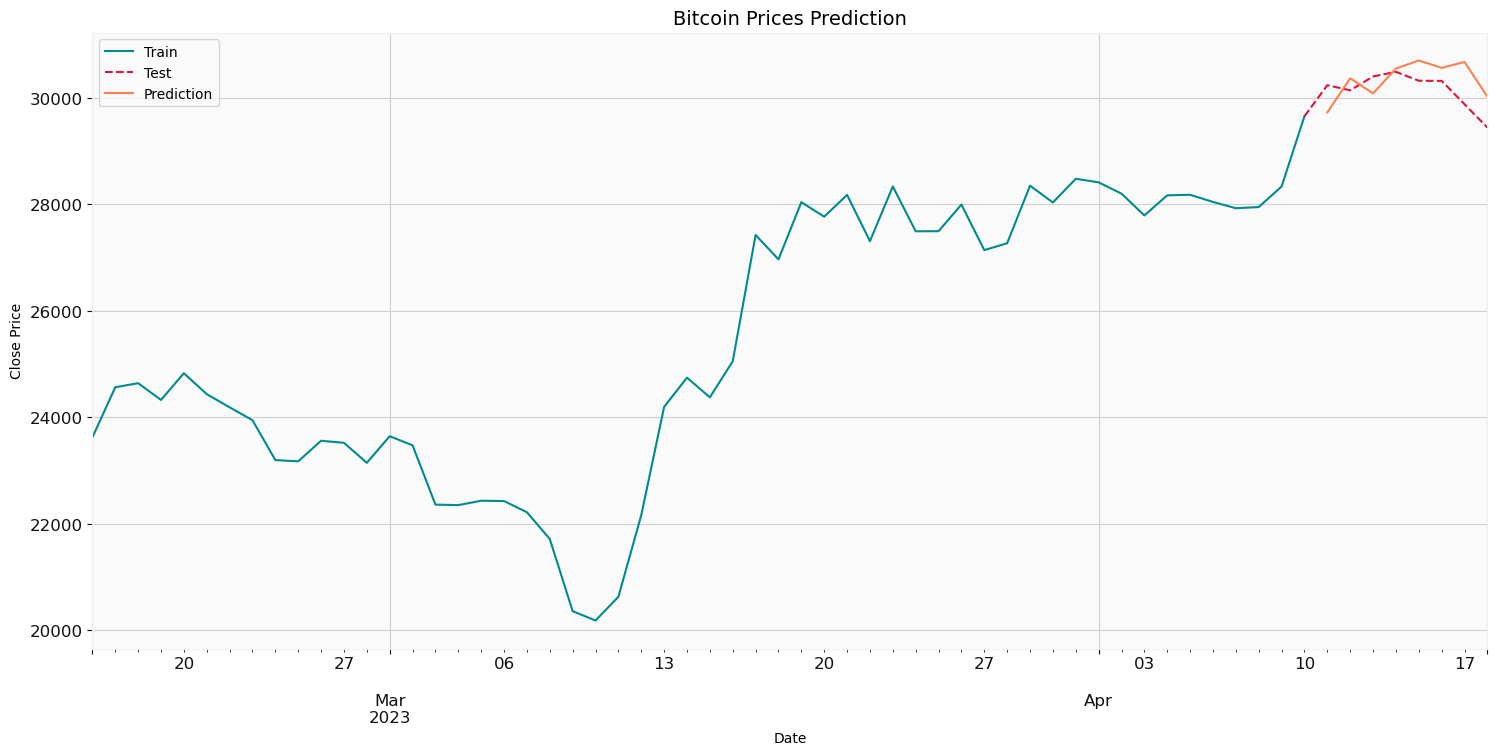

In [16]:
train_graph = train.set_index('date')
test_graph = test.set_index('date')

train_graph.close.plot( figsize=(18,8), fontsize=12, label='Train', color='DarkCyan')
test_graph.close.plot(figsize=(18,8), fontsize=12, label='Test', color='Crimson', ls='--')
predictions.yhat.plot(figsize=(18,8), fontsize=12, label='Prediction', color='Coral')

plt.legend()
plt.title("Bitcoin Prices Prediction", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Close Price")

plt.show()

From the image above, the blue line shows the actual values, using for model training and validation. The red dotted line shows the values using for test and the orange line shows forecast values.  


### 4. Conclusion
---


In this project was presented how to perform time series analysis and forecasting using the Auto Time Series library.   

The model that obtained the best performance - lowest RMSE-  was AUTO_SARIMAX. This model is able to predict prices for the next 8 days with **277.09 for RMSE score** (average distance between the predicted and the actual values) and **0.75% for MAPE score** (mean of all absolute percentage errors between the predicted and actual values), considering evaluation with test dataset.

Finally, it is important to emphasize again that buying and selling trends depend on many factors and the model obtained is only capable of working with historical data.
